# Task 2 :Supervised Machine Learning:¶

## In this regression task we are going to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.This is a linear regression task consisting of two variables.

## Question:What will be the predicted score if a student study for 9.25 hours in a day?  

# Importing specific packages:

In [ ]:
!pip install yellowbrick #downloading the specific package

In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Using pandas for reading the csv file:

In [72]:
data= pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("The given imported data is shown below: \n" ,data)
data.head() #head function to see first 5 observation of the given dataset

The given imported data is shown below: 
     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Checking the overall information that this dataset contains:

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Checking how many rows and columns this dataset contains:

In [76]:
data.shape #to show that there is 25 rows and 2 coloumns

(25, 2)

# Explanatory Data Analysis(EDA):

In [77]:
import pandas_profiling # EDA testing(explanatory data analysis)
data.profile_report()

# Describing some statistical information related to this data:

In [79]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Checking the datatype of  both the columns of the dataset:

In [78]:
data.dtypes   #checking the data type

Hours     float64
Scores      int64
dtype: object

# Checking whether there is any null value in this dataset or not for both Hours and Scores columns:

In [80]:
data['Hours'].isnull().sum()  #to check null values in hours column.

0

In [81]:
data['Scores'].isnull().sum()  #to check null values in Scores column

0

# Counting the number of times both the variable values appear in the dataset:

In [83]:
data['Hours'].value_counts() #to count the values repated here in hours column

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64

In [84]:
data['Scores'].value_counts() # to count the values repeated in the scores column

30    3
95    1
62    1
85    1
86    1
67    1
24    1
69    1
17    1
41    1
42    1
75    1
47    1
76    1
81    1
20    1
21    1
54    1
88    1
25    1
27    1
60    1
35    1
Name: Scores, dtype: int64

# Scatterplot:
Scatter plots are used to plot data points on a horizontal and a vertical axis to study how much one variable is affected by another.

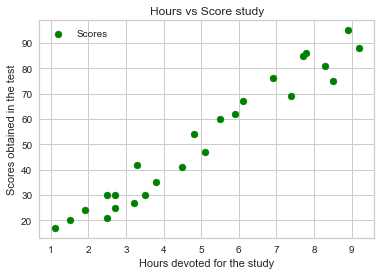

In [85]:
plt.scatter(data['Hours'],data['Scores'],color="green")#plotting the given data to check if there is any relationship  between them.
plt.legend(['Scores'])
plt.title('Hours vs Score study')
plt.xlabel('Hours devoted for the study')
plt.ylabel('Scores obtained in the test')
plt.grid(True)
plt.show()

# Violin Plot:
Violin plot shows the distribution of uantative data across several levels of one (or more) categorical variables such that those distributions can be compared.    

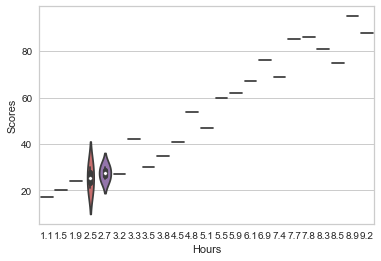

In [86]:
ax=sns.violinplot(x="Hours",y="Scores",data=data,palette="muted",split=True)
plt.show()

# Pairplot:
Pairplot function will create a grid of Axes such that each numeric variable in data will be shared in the y-axis across a single row and in the x-axis across a single column.   

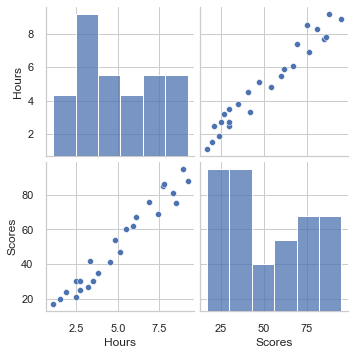

In [87]:
sns.set(style="whitegrid")
sns.pairplot(data)

# Box plot:
Box plots plays an important role as it provide a visual summary of all the statistical data values in terms of graph for both of Hours and Scores.

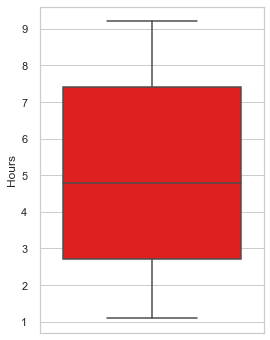

In [88]:
plt.figure(figsize =(4,6))
sns.boxplot(y ="Hours",data = data,color ="red")

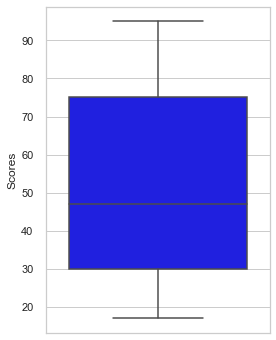

In [89]:
plt.figure(figsize =(4,6))
sns.boxplot(y ="Scores",data = data,color ="blue")
    

# Displot:
This plot helps to study the distribution of the underlying data variables Hours and Scores.

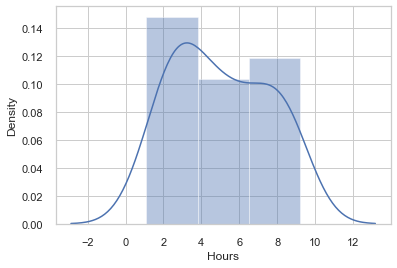

In [90]:
import seaborn as sns
sns.distplot(data['Hours']) #checking of normality of hours

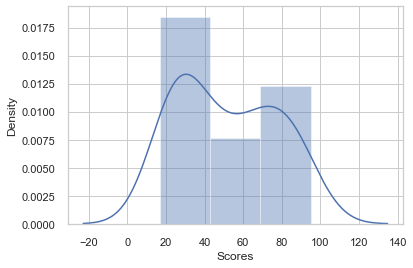

In [91]:
import seaborn as sns
sns.distplot(data['Scores']) #checking of normality of scores

# Heatmap:
A heat map uses a warm-to-cool color spectrum to show you which parts of a page receive the most attention.

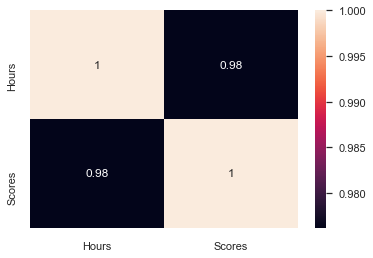

In [92]:
sns.heatmap(data.corr(),annot=True)  #checking of correlation coefficient

# Reg plot:
This plot plots the given data( for this dataset,Hours and Scores) and fits a linear regression line.    

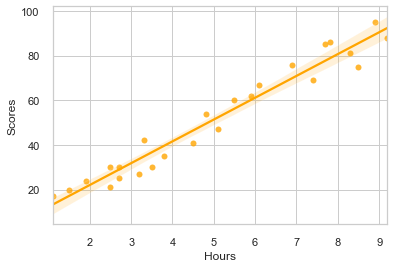

In [93]:
sns.regplot(x=data.Hours,y=data.Scores,color="orange",fit_reg=True) #to plot data and fits a linear regression model over those data points.

# Preparing the data:
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [94]:
X=np.array(data['Hours']).reshape(-1,1) 
y=np.array(data['Scores'])
#X=df.iloc[:,:-1].values
#y=df.iloc[:,1].values
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Building Models:

The next step is to split this data into training and test sets. This will be done by using Scikit-Learn's built-in train_test_split() method:

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Linear Regressor and showing Model accuracy in terms of R square:

Parameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Model Accuracy:  0.9454906892105356


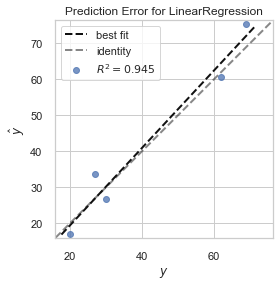

In [96]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import prediction_error
linear=LinearRegression()
linear.fit(X_train, y_train)
#get_parameters()
print('Parameters: ', linear.get_params())
print('Model Accuracy: ', linear.score(X_test, y_test))
visualizer=prediction_error(linear,X_train,y_train,X_test,y_test)

# Finding the array value of Actual and Predicted after fitting Linear Regression Model: 

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_test
yt=np.array(y_test)
yt                                                  

array([20, 27, 69, 30, 62], dtype=int64)

In [98]:
print(X_test) # Testing data - In Hours
y_pred= linear.predict(X_test) # Predicting the scores column
yp=np.array(y_pred)
yp

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Construction of dataframe consisting of Hours, Actual and Predicted columns: 

In [99]:
import numpy as np
time=np.array(data['Hours'][:5])
new_data = pd.DataFrame({"Hours" : time,"Actual": yt, "Predicted": yp})  
print(new_data)

   Hours  Actual  Predicted
0    2.5      20  16.884145
1    5.1      27  33.732261
2    3.2      69  75.357018
3    8.5      30  26.794801
4    3.5      62  60.491033


In [67]:
actual_df=pd.DataFrame({"Hours":time,"score":yt})
predicted_df=pd.DataFrame({"Hours":time,"score":yp})

   Hours      score        scores
0    2.5  20.000000     actual_df
1    5.1  27.000000     actual_df
2    3.2  69.000000     actual_df
3    8.5  30.000000     actual_df
4    3.5  62.000000     actual_df
5    2.5  16.884145  predicted_df
6    5.1  33.732261  predicted_df
7    3.2  75.357018  predicted_df
8    8.5  26.794801  predicted_df
9    3.5  60.491033  predicted_df


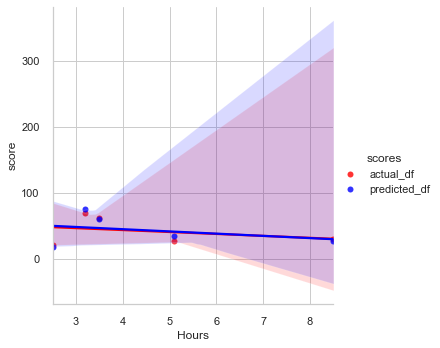

In [100]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
scores=pd.concat([actual_df.rename(columns={'x1':'Hours','y1':'Actual'}).join(pd.Series(['actual_df']*len(actual_df),name='scores')),predicted_df.rename(columns={'x2':'Hours','y2':'Predicted'}).join(pd.Series(['predicted_df']*len(predicted_df),name='scores'))],ignore_index=True)
print(scores)
pal=dict(actual_df="red",predicted_df="blue")
g=sns.FacetGrid(scores,hue='scores',palette=pal,height=5);
g.map(plt.scatter,"Hours","score",s=50,alpha=0,linewidth=0.5,edgecolor="white")
g.map(sns.regplot,"Hours","score")
g.add_legend();

# Visulizing Actual Vs Predicted through barplot:

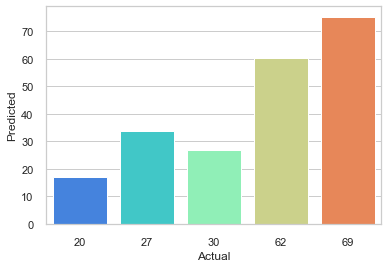

In [101]:
import seaborn as sns
sns.barplot("Actual","Predicted",data=new_data,palette='rainbow')

# Ridge Regressor:

model accuracy: 0.9469535028586777


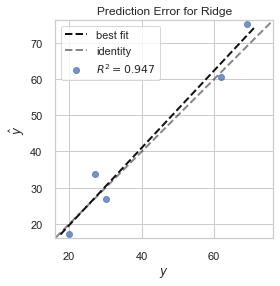

In [102]:
from sklearn.linear_model import Ridge
model_Ridge= Ridge(alpha = 1.0)
model_Ridge.fit(X_train, y_train)
print("model accuracy:",model_Ridge.score(X_test,y_test))
visualizer = prediction_error(model_Ridge,X_train, y_train,X_test, y_test)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_test
yt=np.array(y_test)
yt                                                  
print(X_test) # Testing data - In Hours
y_pred=model_Ridge.predict(X_test) # Predicting the scores column
yp=np.array(y_pred)
yp

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([17.18169996, 33.89456361, 75.18516794, 27.01279622, 60.43852354])

In [104]:
# Comparing Actual vs Predicted
R2= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
R2 

,Actual,Predicted
0,20,17.181700
1,27,33.894564
2,69,75.185168
3,30,27.012796
4,62,60.438524


In [106]:
x_pred=np.array([9.25]).reshape(-1,1)
model_Ridge.fit(X, y)
y_pred=model_Ridge.predict(x_pred)
print(y_pred[0])
y_pred=np.array(y_pred)

92.64087584985432


# Random Forest Regressor:

model accuracy: 0.8032653018232496


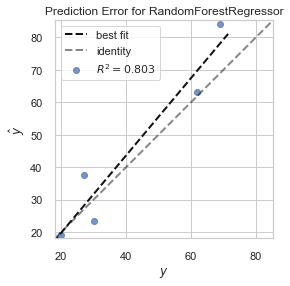

In [107]:
from sklearn.ensemble import RandomForestRegressor
model_RandomForestRegressor=RandomForestRegressor(random_state = 0)
model_RandomForestRegressor.fit(X_train, y_train)
print("model accuracy:",model_RandomForestRegressor.score(X_test,y_test))
visualizer = prediction_error(model_RandomForestRegressor,X_train, y_train,X_test, y_test)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_test
yt=np.array(y_test)
yt                                                  
print(X_test) # Testing data - In Hours
y_pred=model_RandomForestRegressor.predict(X_test) # Predicting the scores column
yp=np.array(y_pred)
yp

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([19.21      , 37.58      , 84.26      , 23.43583333, 63.12      ])

In [43]:
x_pred=np.array([9.25]).reshape(-1,1)
model_RandomForestRegressor.fit(X, y)
y_pred=model_RandomForestRegressor.predict(x_pred)
print(y_pred[0])
y_pred=np.array(y_pred)

88.64


# Lasso Regressor:

[9.89447106]
2.102971643143846
model accuracy: 0.9458042029961533


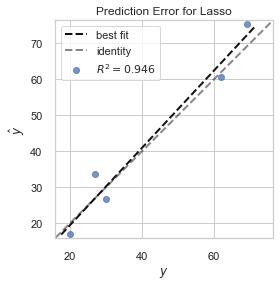

In [109]:
from sklearn import linear_model
clf=linear_model.Lasso(alpha=0.1)
clf.fit(X_train,y_train)
print(clf.coef_)
print(clf.intercept_)
print("model accuracy:",clf.score(X_test,y_test))
visualizer = prediction_error(clf,X_train, y_train,X_test, y_test)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_test
yt=np.array(y_test)
yt                                                  
print(X_test) # Testing data - In Hours
y_pred=clf.predict(X_test) # Predicting the scores column
yp=np.array(y_pred)
yp

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.94467823, 33.76527904, 75.32205749, 26.83914929, 60.4803509 ])

In [120]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': yt, 'Predicted': yp})  
df 

,Actual,Predicted
0,20,16.944678
1,27,33.765279
2,69,75.322057
3,30,26.839149
4,62,60.480351


In [112]:
x_pred=np.array([9.25]).reshape(-1,1)
clf.fit(X, y)
y_pred=clf.predict(x_pred)
print(y_pred[0])
y_pred=np.array(y_pred)

92.8406183508205


# RANSAC Regressor:

model accuracy: 0.9454906892105356


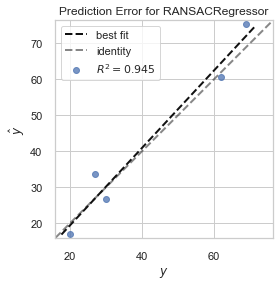

In [113]:
from sklearn.linear_model import RANSACRegressor
model_RANSACRegressor=RANSACRegressor(random_state=0)
model_RANSACRegressor.fit(X_train,y_train)
print("model accuracy:",model_RANSACRegressor.score(X_test,y_test))
visualizer=prediction_error(model_RANSACRegressor,X_train, y_train,X_test, y_test)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_test
yt=np.array(y_test)
yt                                                  
print(X_test) # Testing data - In Hours
y_pred=model_RANSACRegressor.predict(X_test) # Predicting the scores column
yp=np.array(y_pred)
yp

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [116]:
# Comparing Actual vs Predicted
d1 = pd.DataFrame({'Actual': yt, 'Predicted': yp})  
d1

,Actual,Predicted
0,20,16.944678
1,27,33.765279
2,69,75.322057
3,30,26.839149
4,62,60.480351


In [117]:
x_pred=np.array([9.25]).reshape(-1,1)
model_RANSACRegressor.fit(X, y)
y_pred=model_RANSACRegressor.predict(x_pred)
print(y_pred[0])
y_pred=np.array(y_pred)

91.96474358974356


# Interpretation:
Based on all the above-mentioned models,it is evident that the linear regression performs the best among all in terms of R square and also graphical representation.So the predicted value will be pretty close to the actual one using this model.   

# Result of predicted Score:

In [118]:
import numpy as np
x_pred=np.array([9.25]).reshape(-1,1)
linear.fit(X, y)
y_pred=linear.predict(x_pred)

In [119]:
print("Number of Hours:",9.25)
print("predicted score:",y_pred[0])

Number of Hours: 9.25
predicted score: 92.90985477015731


# Made by Sohini Roy 